In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load image and convert to numpy array
image_path = "flower.jpeg"  # Update the path to your image
image = Image.open(image_path)
image_array = np.array(image)

In [3]:
# Ensure the image is in RGB format
if image_array.ndim == 2:  # Grayscale to RGB
    image_array = np.stack([image_array] * 3, axis=-1)
elif image_array.shape[2] == 4:  # RGBA to RGB
    image_array = image_array[:, :, :3]


In [5]:
# Define color transformations
def apply_sepia(image_array):
    """Apply a sepia filter to the image array."""
    sepia_filter = np.array([[0.272, 0.534, 0.131],
                             [0.349, 0.686, 0.168],
                             [0.393, 0.769, 0.189]])
    sepia_image = image_array @ sepia_filter.T
    sepia_image = np.clip(sepia_image, 0, 255).astype(np.uint8)
    return sepia_image


def apply_grayscale(image_array):
    """Convert the image array to grayscale."""
    grayscale_image = np.dot(image_array[...,:3], [0.2989, 0.5870, 0.1140])
    grayscale_image = np.stack([grayscale_image] * 3, axis=-1)
    return grayscale_image.astype(np.uint8)

def apply_inverted(image_array):
    """Invert the colors of the image array."""
    inverted_image = 255 - image_array
    return inverted_image


In [6]:
# Apply transformations
sepia_image = apply_sepia(image_array)
grayscale_image = apply_grayscale(image_array)
inverted_image = apply_inverted(image_array)


In [7]:
# Create a dataset with transformed images
dataset = np.array([image_array, sepia_image, grayscale_image, inverted_image], dtype=np.uint8)


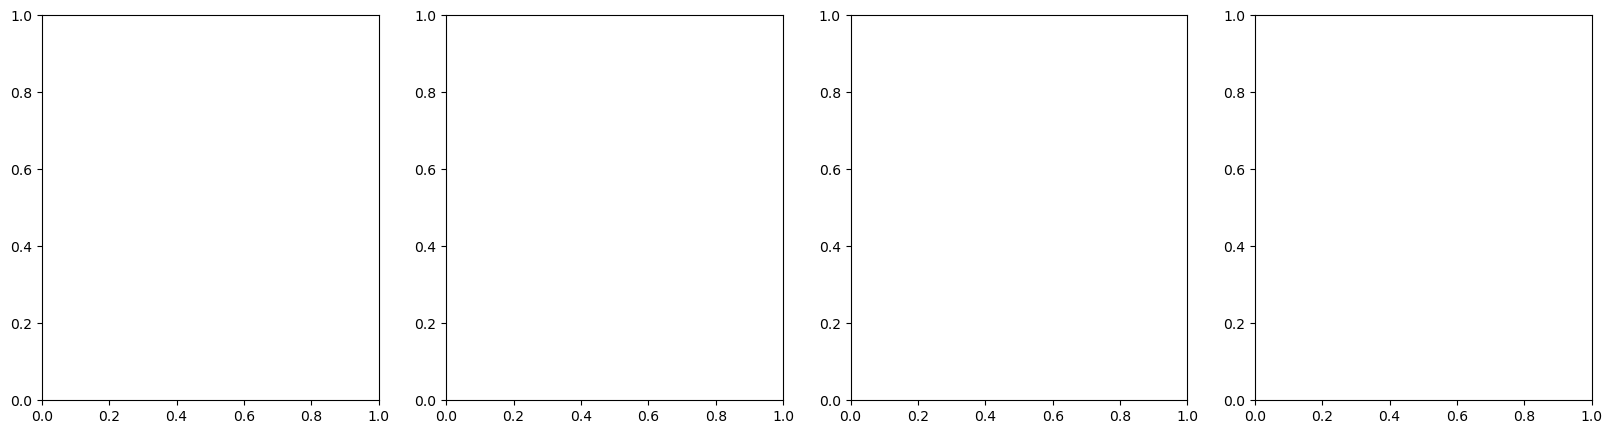

In [8]:
# Display the images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
